# Step 1: Import Required Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


# Step 2: Upload CSV File Using Google Colab’s Upload Option

In [3]:
# Import the files module for uploading
from google.colab import files

# Upload the CSV file
uploaded = files.upload()



Saving Cluster2_Pheno-data.csv to Cluster2_Pheno-data.csv


In [4]:
# Load the dataset
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Cluster2_Pheno-data.csv']))

# Preview the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   Unnamed: 0  ProjectID shorthand_x                   FILE_LIST_x  YEAR_x  \
0           0     235024        C2.1  project235024_year2001.Rdata    2001   
1           1     235024        C2.1  project235024_year2001.Rdata    2001   
2           2     235024        C2.1  project235024_year2001.Rdata    2001   
3           3     235024        C2.1  project235024_year2001.Rdata    2001   
4           4     235024        C2.1  project235024_year2001.Rdata    2001   

    LOC  LONGITUDE  LATITUDE  LINE      ERM  ...  shorthand_y  Unnamed: 0_y  \
0  ILBM     -89.12     39.70   1.0  115.337  ...         C2.1          1381   
1  ILMN     -90.65     40.91   1.0  113.284  ...         C2.1          1381   
2  INVI     -87.52     38.68   1.0  114.346  ...         C2.1          1381   
3  MOBU     -94.20     39.14   1.0  113.914  ...         C2.1          1381   
4  MOHA     -94.98     39.34   1.0  116.823  ...         C2.1          1381   

   MAB_PROJECT_ID  YEAR_y  GERMPLASM_ID

# Step 3: Exploratory Data Analysis (EDA)

EDA helps you explore the dataset’s distribution, relationships, and any anomalies.

In [8]:
# Summary Statistics

## summary statistics for numerical columns

print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          Unnamed: 0     ProjectID         YEAR_x      LONGITUDE  \
count  535340.000000  5.353400e+05  535340.000000  532726.000000   
mean   267669.500000  5.120760e+06    2004.198160     -91.237992   
std    154539.490891  2.866665e+06       2.059361       5.036232   
min         0.000000  2.350240e+05    2000.000000    -102.500000   
25%    133834.750000  3.426407e+06    2003.000000     -94.890000   
50%    267669.500000  3.438435e+06    2004.000000     -91.340000   
75%    401504.250000  9.442056e+06    2005.000000     -88.570000   
max    535339.000000  1.006631e+07    2008.000000     -75.610000   

            LATITUDE           LINE            ERM            MST  \
count  532726.000000  535340.000000  331368.000000  520111.000000   
mean       41.201070     139.168378     107.540295      19.613414   
std         2.363221     270.537271       6.890731       4.131381   
min        30.870000       1.000000     -24.308700       8.220000   
25%        39.980000 

In [9]:
# check for unique values in the categorocal columns

categorical_columns = ['YEAR_x', 'LOC', 'LINE_UNIQUE_ID', 'CROSS']

for col in categorical_columns:
    print(f"\nUnique values in {col}: {data[col].nunique()}")



Unique values in YEAR_x: 9

Unique values in LOC: 390

Unique values in LINE_UNIQUE_ID: 76635

Unique values in CROSS: 473


### Visualizations for Key Columns
Use visualizations to better understand the data's distribution and any potential outliers.

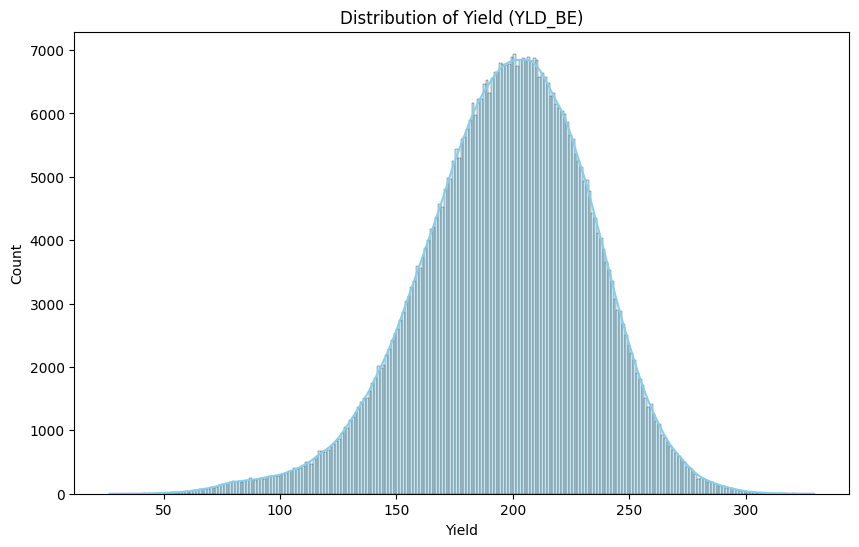

In [10]:
# Distribution of Yield (YLD_BE)

plt.figure(figsize=(10, 6))
sns.histplot(data['YLD_BE'], kde=True, color='skyblue')
plt.xlabel('Yield')
plt.title('Distribution of Yield (YLD_BE)')
plt.show()

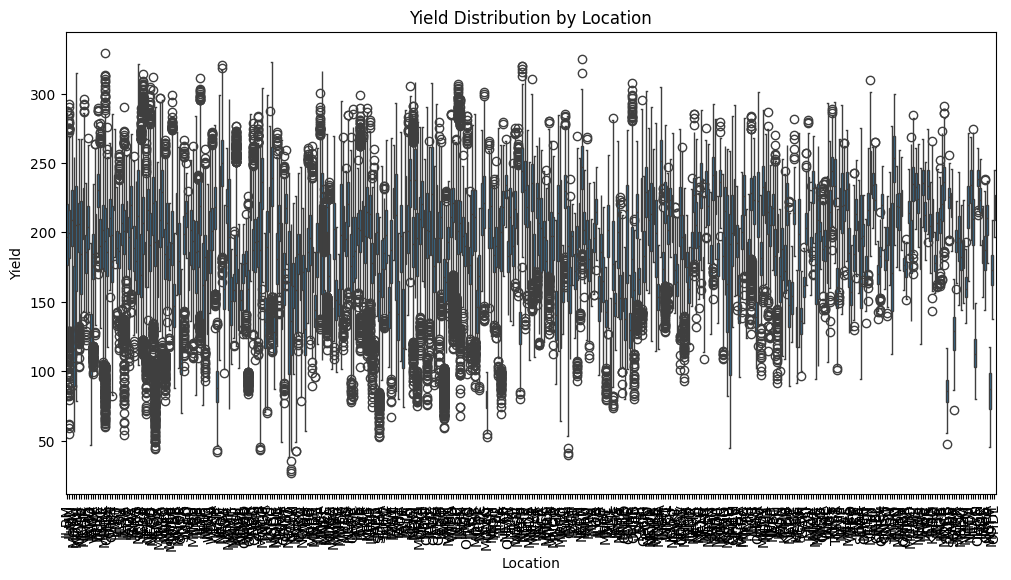

In [11]:
# Boxplot for Yield (YLD_BE) by location

plt.figure(figsize=(12, 6))
sns.boxplot(x='LOC', y='YLD_BE', data=data)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Yield')
plt.title('Yield Distribution by Location')
plt.show()

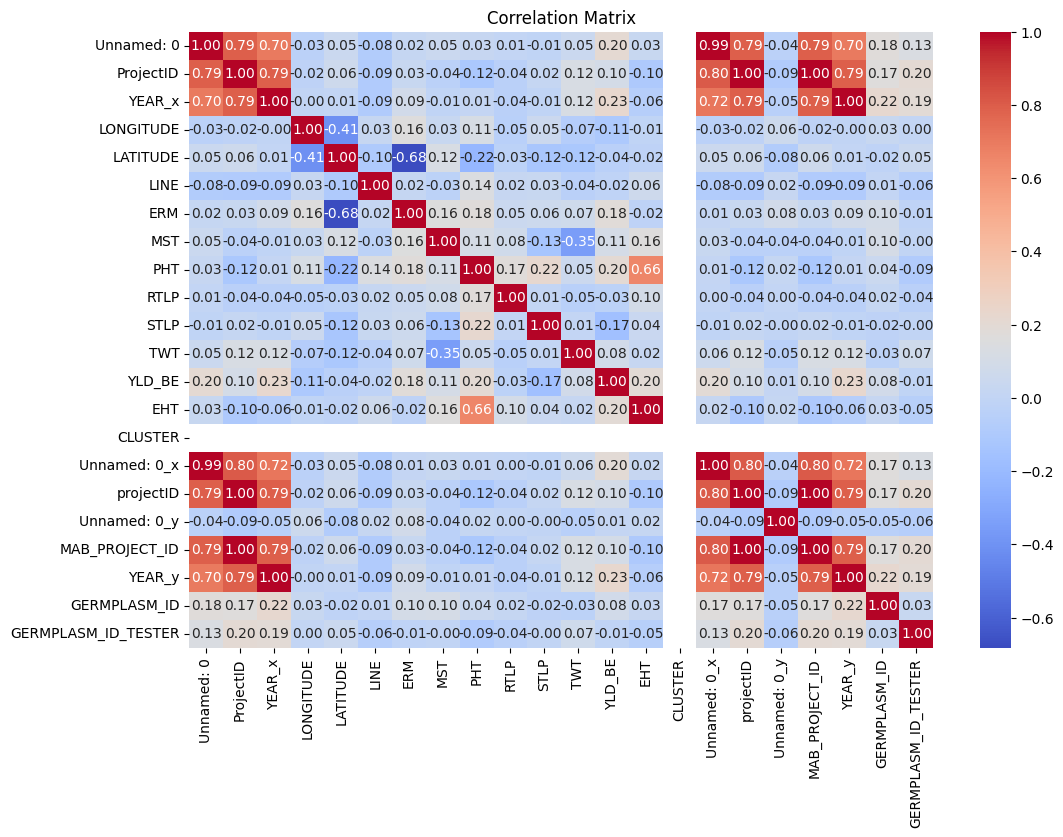

In [15]:
# Correlation matrix

plt.figure(figsize=(12, 8))
## sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
## If we use data.corr(), then it will throw an error, because there are some column which are not numeric.
## So, we need to select only numeric columns for this matrix

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

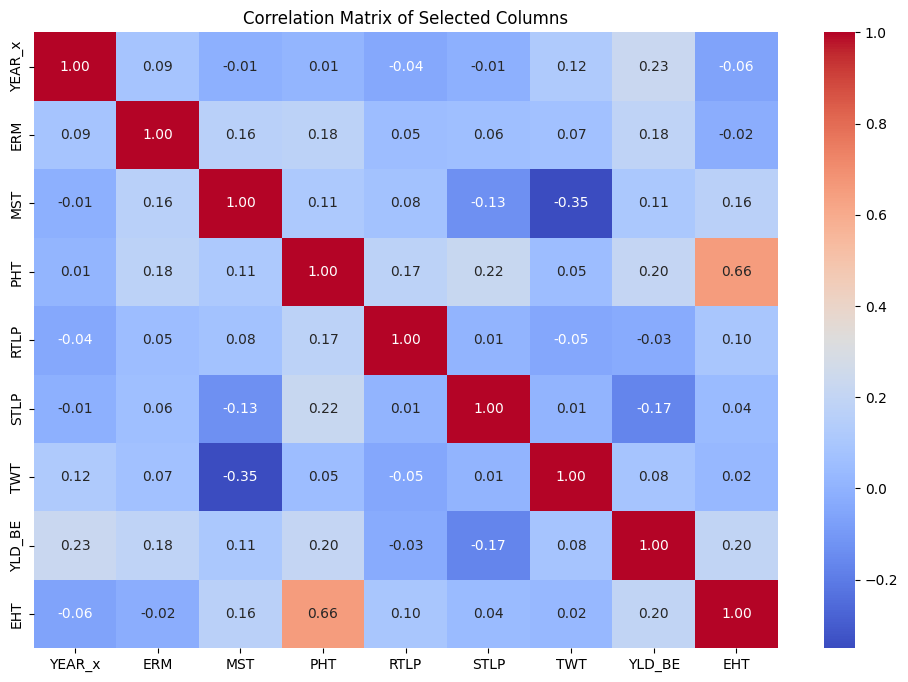

In [16]:
# Select only the specific columns for the correlation matrix
selected_columns = ['YEAR_x', 'ERM', 'MST', 'PHT', 'RTLP', 'STLP', 'TWT', 'YLD_BE', 'EHT']
selected_data = data[selected_columns]

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Columns')
plt.show()
